###Assignment 1: Text Classification
####Objective
This assignment aims to help you understand the basics of text preprocessing, classification,
and evaluation.
####Instructions
Complete the tasks below. Each task specifies the marks assigned. Submit your code,
outputs, and a brief explanation for each step.
* Dataset: [text_class]('https://docs.google.com/spreadsheets/d/1Q0YJv_u01i9GGOm2yLCH8Mq-v0KbDgx-AP6Jb2hepP8/edit?gid=90439677#gid=90439677')

In [25]:
# Import all necessary liabrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
# upload dataset
url = 'https://docs.google.com/spreadsheets/d/1Q0YJv_u01i9GGOm2yLCH8Mq-v0KbDgx-AP6Jb2hepP8/export?format=csv&gid=90439677'
df = pd.read_csv(url)
df.head(5)

,text,label
0,"I loved the product, it's amazing!",positive
1,"Terrible service, I will never shop here again.",negative
2,"The quality is good, but the delivery was late.",neutral
3,"Absolutely wonderful experience, highly recomm...",positive
4,"Product was damaged when it arrived, very disa...",negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8 non-null      object
 1   label   8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes


In [6]:
print("Duplicate Values:",df.duplicated().sum())
print("Missing Values:")
df.isnull().sum()

Duplicate Values: 0
Missing Values:


,0
text,0
label,0


In [7]:
df['label'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

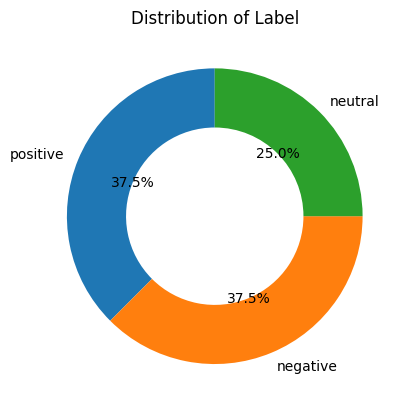

In [8]:
label_count = df['label'].value_counts()
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.4))
plt.title("Distribution of Label")
plt.show()

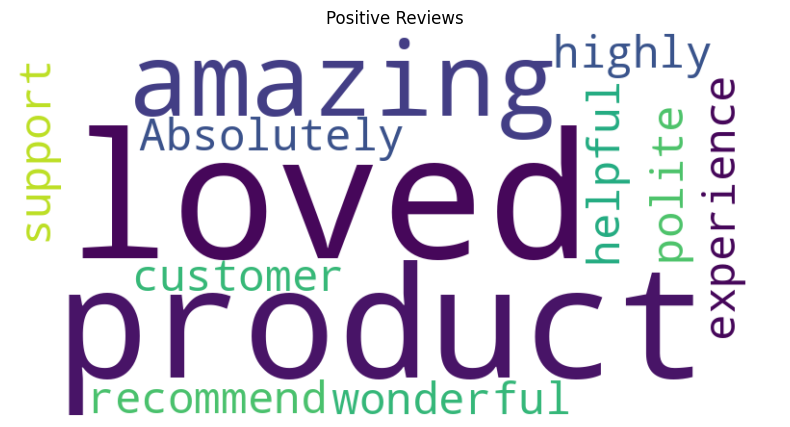

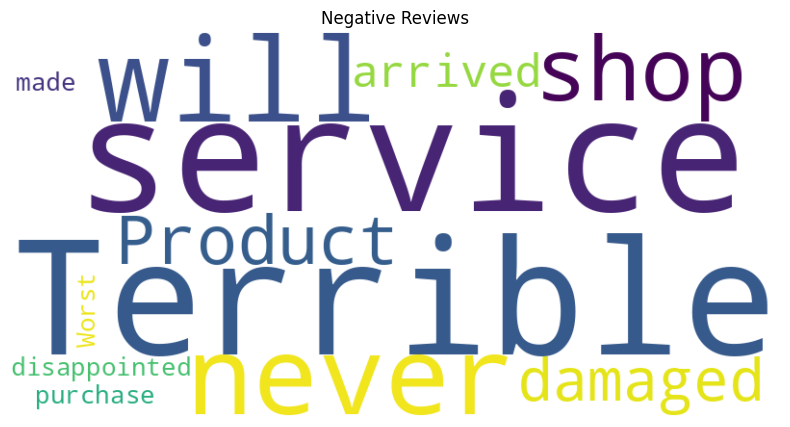

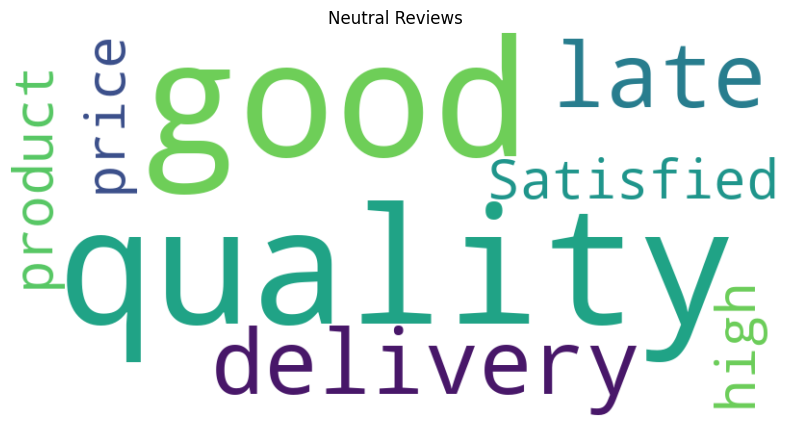

In [9]:
# wordcloud for each lebel type in the dataset
review_types = ['positive','negative','neutral']

for col in review_types:
  review_text = ' '.join(df[df['label'] == col]['text'])
  # Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
  # plot the word cloud
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'{col.capitalize()} Reviews')

In [12]:
# Basic review statistics
df['text_length'] = df['text'].apply(len)
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df.head(5)

,text,label,text_length,text_word_count
0,"I loved the product, it's amazing!",positive,34,6
1,"Terrible service, I will never shop here again.",negative,47,8
2,"The quality is good, but the delivery was late.",neutral,47,9
3,"Absolutely wonderful experience, highly recomm...",positive,50,5
4,"Product was damaged when it arrived, very disa...",negative,55,8


####Text cleaning and Preprocessing

In [15]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z\s]","",text)
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

In [18]:
df['tokens'] = df['text'].apply(preprocess)
print("Original Text:", df['text'][1])
print("Clean Text:", df['tokens'][1])

Original Text: Terrible service, I will never shop here again.
Clean Text: ['terrible', 'service', 'never', 'shop']


In [21]:
df['tokens'].head(5)

,tokens
0,"[loved, product, amazing]"
1,"[terrible, service, never, shop]"
2,"[quality, good, delivery, late]"
3,"[absolutely, wonderful, experience, highly, re..."
4,"[product, damaged, arrived, disappointed]"


####Prepare the data for modeling:

In [22]:
# Convert list of tokens back to strings for vectorizer
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['clean_text'].head(3)

,clean_text
0,loved product amazing
1,terrible service never shop
2,quality good delivery late


In [26]:
# Encode labels
le = LabelEncoder()
# Vectorize text data
vectorize = CountVectorizer()


In [29]:
x = vectorize.fit_transform(df['clean_text'])
y = le.fit_transform(df['label'])

print(dict(zip(le.classes_,le.transform(le.classes_))))
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

{'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [30]:
# Train a logistic regression model and predict
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy:", acc)

Accuracy: 0.5


* The model got 1 out of 2 test predictions right, which means it had 50% accuracy. But because the test set is very small, this result doesn't really tell us how good the model is. To properly check how well the model works, we need to use a larger dataset.

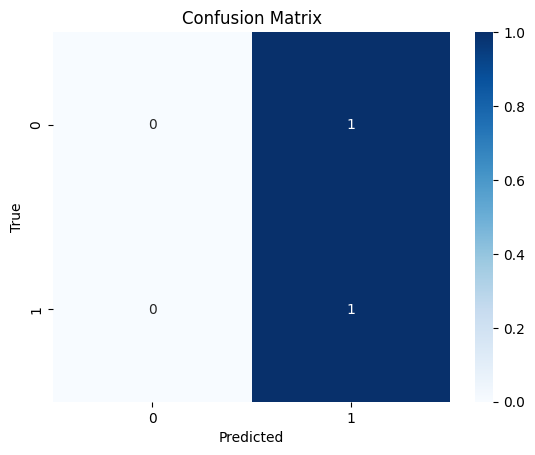

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [32]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

* It predicted 1 positive label correctly.
* It failed to predict the negative label.
* negative: 0.00 --> the 1 actual negative was not predicted correctly.

* The confusion matrix shows that the model was able to correctly classify one positive sample but failed to classify the negative one. It helps us understand not just the overall accuracy but which specific classes the model is misclassifying, which is especially useful in imbalanced datasets.
